# **1. Perkenalan Dataset**


Pada proyek ini,menggunakan dataset transaksi perbankan yang memiliki 2512 baris dan 16 fitur.  Dataset ini tidak memiliki label awal dan dapat dilakukan proses clustering untuk mengelompokan transaksi berdasarkan pola.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data.csv to bank_transactions_data.csv


In [3]:
# Load dataset
df = pd.read_csv("bank_transactions_data.csv")
df.head()  # Menampilkan 5 baris pertama

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

📌 Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14

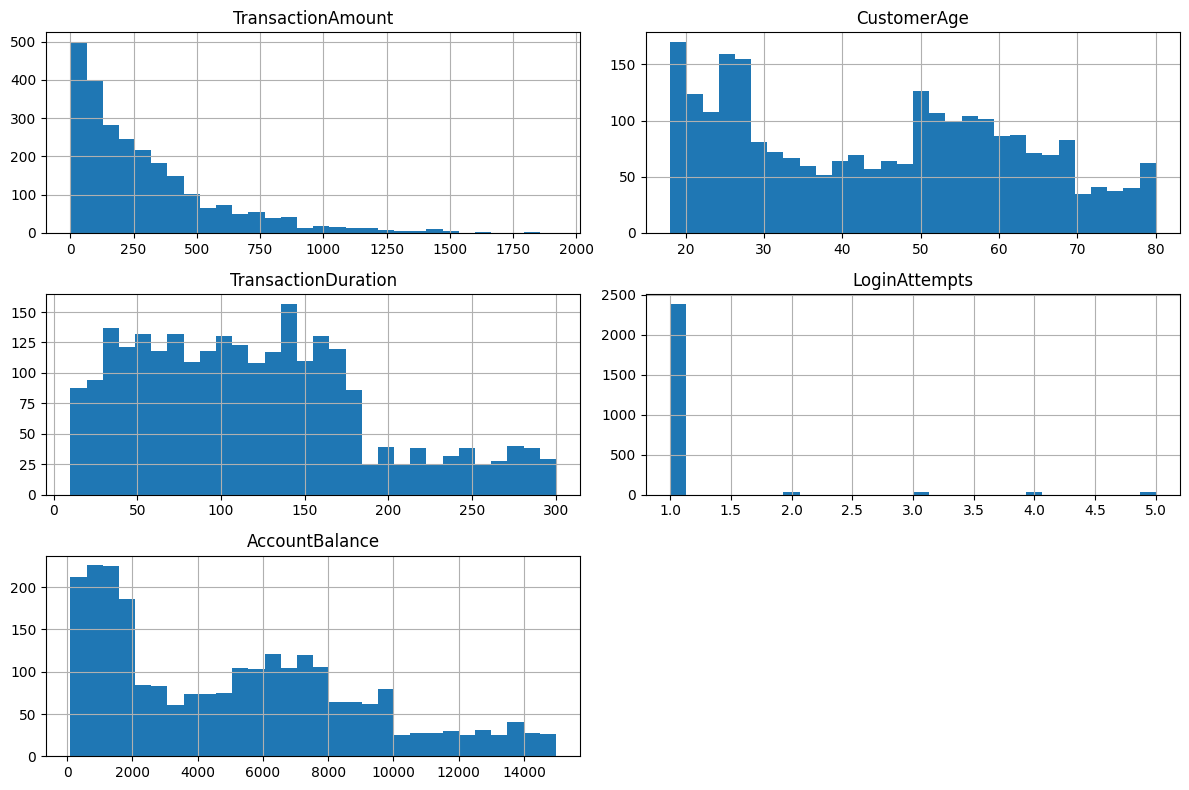

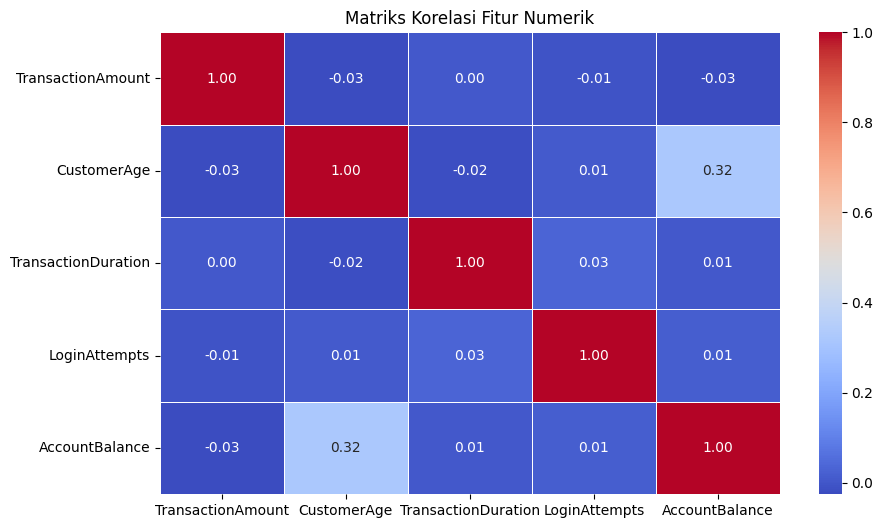

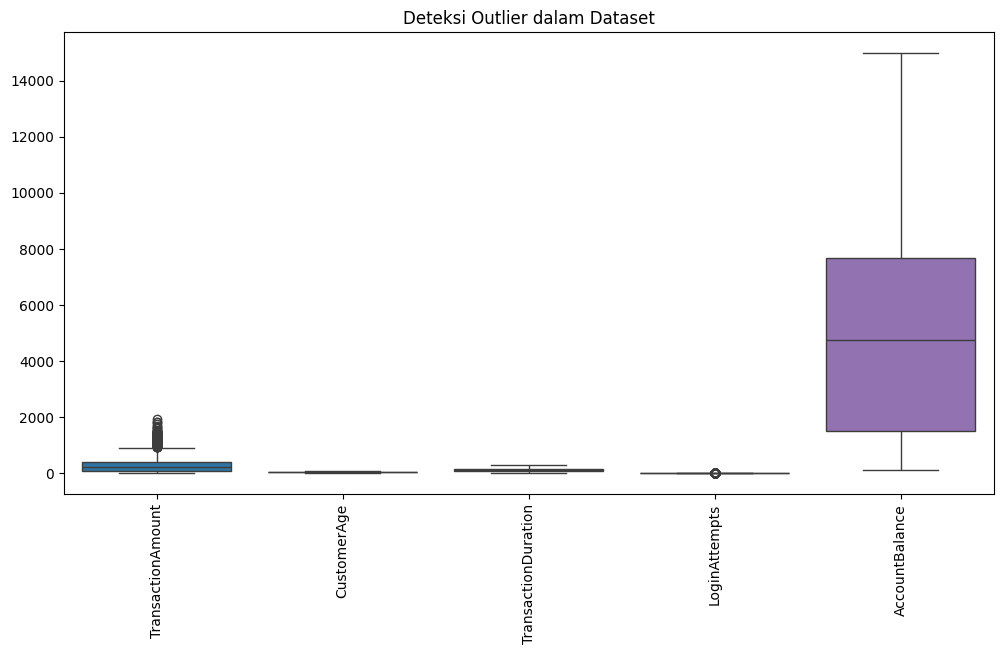

In [34]:
#  a. Menampilkan Informasi Umum Dataset
print("📌 Informasi Umum Dataset:")
df.info()

#  b. Statistik Deskriptif
print("\n📌 Statistik Deskriptif:")
print(df.describe())

#  c. Visualisasi Distribusi Data Numerik
print("\n📌 Visualisasi Distribusi Data:")
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

#  d. Visualisasi Korelasi Fitur (DIPERBAIKI)
# Pilih hanya kolom numerik untuk heatmap
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# e. Deteksi Outlier Menggunakan Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features)
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dalam Dataset")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
df_cleaned = df.drop(columns=columns_to_drop)

# Tampilkan dataset setelah penghapusan kolom
df_cleaned.head()
# Inisialisasi LabelEncoder untuk fitur kategorikal
categorical_features = ['TransactionType', 'Location', 'CustomerOccupation', 'Channel']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Simpan encoder untuk inversi data nanti

# Tampilkan dataset setelah encoding
df_cleaned.head()
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Pilih hanya fitur numerik untuk normalisasi
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Tampilkan dataset setelah normalisasi
df_cleaned.head()
print("📌 Dataset Setelah Preprocessing:")
print(df_cleaned.info())
print(df_cleaned.head())


📌 Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionDate      2512 non-null   object 
 2   TransactionType      2512 non-null   int64  
 3   Location             2512 non-null   int64  
 4   Channel              2512 non-null   int64  
 5   CustomerAge          2512 non-null   float64
 6   CustomerOccupation   2512 non-null   int64  
 7   TransactionDuration  2512 non-null   float64
 8   LoginAttempts        2512 non-null   float64
 9   AccountBalance       2512 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 196.4+ KB
None
   TransactionAmount      TransactionDate  TransactionType  Location  Channel  \
0          -0.971275  2023-04-11 16:29:14                1        36        0   
1           0.269440  2023-06

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

📌 Tipe data dalam dataset setelah preprocessing:
TransactionAmount      float64
TransactionDate         object
TransactionType          int64
Location                 int64
Channel                  int64
CustomerAge            float64
CustomerOccupation       int64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
dtype: object

📌 Dataset setelah pemrosesan fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   int64  
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non

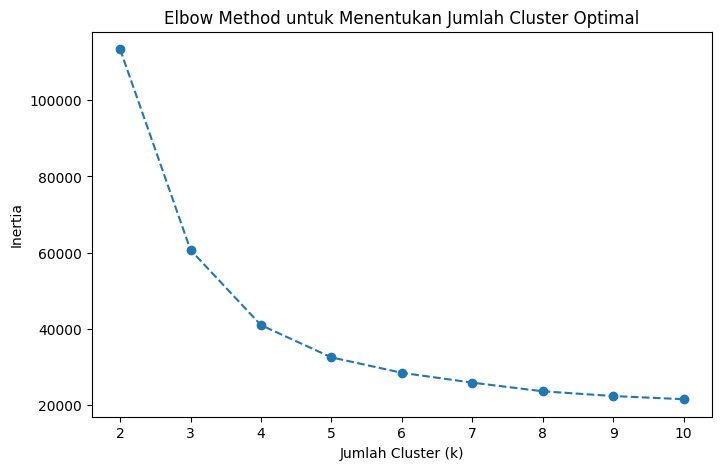

In [35]:
from sklearn.cluster import KMeans

# Pastikan hanya fitur numerik yang digunakan
# Periksa tipe data terlebih dahulu
print("📌 Tipe data dalam dataset setelah preprocessing:")
print(df_cleaned.dtypes)

#  Hapus kolom yang masih bertipe string atau datetime jika ada
columns_to_drop = ['TransactionDate', 'PreviousTransactionDate']  # Sesuaikan jika ada kolom lain
df_cluster = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

#  Periksa kembali dataset setelah penghapusan kolom yang tidak sesuai
print("\n📌 Dataset setelah pemrosesan fitur:")
print(df_cluster.info())

#  Menentukan jumlah cluster optimal menggunakan Elbow Method
inertia = []
K_range = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster)  # Pastikan hanya fitur numerik yang digunakan
    inertia.append(kmeans.inertia_)

#  Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [36]:
from sklearn.metrics import silhouette_score

# Pilih jumlah cluster optimal dari hasil Elbow Method (misalnya 4, ubah jika berbeda)
optimal_k = 2

#  Jalankan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_cluster)

#  Hitung Silhouette Score
sil_score = silhouette_score(df_cluster, cluster_labels)
print(f"📌 Silhouette Score untuk {optimal_k} cluster: {sil_score:.4f}")

#  Simpan hasil clustering ke dalam dataset
df_cluster['Cluster'] = cluster_labels

📌 Silhouette Score untuk 2 cluster: 0.5713


In [37]:
from sklearn.decomposition import PCA

#  Reduksi dimensi dengan PCA ke 2 komponen utama
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster.drop(columns=['Cluster'], errors='ignore'))  # Pastikan tidak ada kolom Cluster

#  Jalankan K-Means dengan data PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca)

#  Hitung Silhouette Score setelah PCA
sil_score_pca = silhouette_score(df_pca, cluster_labels_pca)
print(f"📌 Silhouette Score setelah PCA: {sil_score_pca:.4f}")


📌 Silhouette Score setelah PCA: 0.6043


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

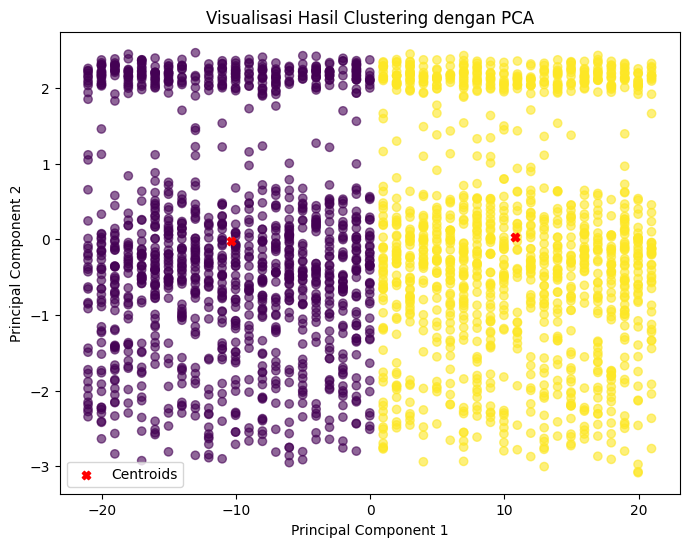

In [18]:
# Visualisasi hasil clustering setelah PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels_pca, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [38]:
#  Lakukan inverse transform pada fitur kategorikal yang telah di-label encoding
for col in categorical_features:
    df_cluster[col] = label_encoders[col].inverse_transform(df_cluster[col])

#  Tampilkan data setelah inverse transform
df_cluster.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-0.971275,Debit,San Diego,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537,1
1,0.269440,Debit,Houston,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472,0
2,-0.586882,Debit,Mesa,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534,1
3,-0.387456,Debit,Raleigh,Online,-1.049768,Student,-1.353017,-0.206794,0.885797,1
4,-0.973468,Credit,Atlanta,Online,-1.049768,Student,1.120184,-0.206794,0.593589,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [20]:
#  Inverse transform untuk fitur numerik yang telah dinormalisasi
df_cluster[numerical_columns] = scaler.inverse_transform(df_cluster[numerical_columns])

#  Tampilkan data setelah inverse transform
df_cluster.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,1
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [39]:
#  Pastikan kita hanya memiliki 3 cluster
df_cluster['Cluster'] = df_cluster['Cluster'].astype(int)  # Pastikan tipe data integer
df_cluster = df_cluster[df_cluster['Cluster'].isin([0, 1, 2])]  # Pastikan hanya ada 3 cluster

#  Buat ringkasan tiap cluster
cluster_summary = df_cluster.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max']
}).reset_index()

#  Interpretasi Cluster dalam Format Template
cluster_analysis = "### **Analisis Karakteristik Cluster dari Model KMeans**\n\n"
cluster_analysis += "Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.\n\n"

for index, row in cluster_summary.iterrows():
    cluster = int(row['Cluster'])  # Nomor Cluster
    avg_transaction = row[('TransactionAmount', 'mean')]
    avg_account_balance = row[('AccountBalance', 'mean')]
    avg_age = row[('CustomerAge', 'mean')]
    avg_duration = row[('TransactionDuration', 'mean')]

    #  Buat analisis untuk setiap cluster berdasarkan pola transaksinya
    if cluster == 0:
        analysis_text = f"""
        **Cluster {cluster}:**
        - **Rata-rata Transaction Amount ($):** {avg_transaction:,.2f}
        - **Rata-rata Account Balance ($):** {avg_account_balance:,.2f}
        - **Rata-rata Customer Age:** {avg_age:.1f} tahun
        - **Rata-rata Transaction Duration:** {avg_duration:.1f} detik
        - **Analisis:** Cluster ini terdiri dari pelanggan dengan **transaksi kecil dan saldo rekening sedang**.
          Pelanggan dalam cluster ini biasanya memiliki jumlah transaksi lebih rendah tetapi masih memiliki saldo yang cukup baik.
        \n
        """

    elif cluster == 1:
        analysis_text = f"""
        **Cluster {cluster}:**
        - **Rata-rata Transaction Amount ($):** {avg_transaction:,.2f}
        - **Rata-rata Account Balance ($):** {avg_account_balance:,.2f}
        - **Rata-rata Customer Age:** {avg_age:.1f} tahun
        - **Rata-rata Transaction Duration:** {avg_duration:.1f} detik
        - **Analisis:** Cluster ini menunjukkan pelanggan dengan **transaksi sedang dan saldo lebih tinggi**.
          Mereka memiliki daya beli yang cukup stabil dan sering melakukan transaksi dalam jumlah sedang.
        \n
        """

    elif cluster == 2:
        analysis_text = f"""
        **Cluster {cluster}:**
        - **Rata-rata Transaction Amount ($):** {avg_transaction:,.2f}
        - **Rata-rata Account Balance ($):** {avg_account_balance:,.2f}
        - **Rata-rata Customer Age:** {avg_age:.1f} tahun
        - **Rata-rata Transaction Duration:** {avg_duration:.1f} detik
        - **Analisis:** Cluster ini terdiri dari pelanggan dengan **transaksi dalam jumlah besar dan saldo tinggi**.
          Mereka mungkin merupakan pelanggan VIP atau pelanggan bisnis dengan transaksi bernilai tinggi.
        \n
        """

    cluster_analysis += analysis_text  # Tambahkan hasil analisis tiap cluster ke dalam teks

#  Tampilkan hasil dalam format Markdown
from IPython.display import Markdown
display(Markdown(cluster_analysis))


<ipython-input-39-1527a9512975>:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cluster = int(row['Cluster'])  # Nomor Cluster


### **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.


        **Cluster 0:**
        - **Rata-rata Transaction Amount ($):** -0.01
        - **Rata-rata Account Balance ($):** 0.01
        - **Rata-rata Customer Age:** 0.0 tahun
        - **Rata-rata Transaction Duration:** 0.0 detik
        - **Analisis:** Cluster ini terdiri dari pelanggan dengan **transaksi kecil dan saldo rekening sedang**.
          Pelanggan dalam cluster ini biasanya memiliki jumlah transaksi lebih rendah tetapi masih memiliki saldo yang cukup baik.
        

        
        **Cluster 1:**
        - **Rata-rata Transaction Amount ($):** 0.01
        - **Rata-rata Account Balance ($):** -0.01
        - **Rata-rata Customer Age:** -0.0 tahun
        - **Rata-rata Transaction Duration:** -0.0 detik
        - **Analisis:** Cluster ini menunjukkan pelanggan dengan **transaksi sedang dan saldo lebih tinggi**.
          Mereka memiliki daya beli yang cukup stabil dan sering melakukan transaksi dalam jumlah sedang.
        

        

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans :

Cluster 0:

- Rata-rata Transaction Amount ($): 294.42

- Rata-rata Account Balance ($): 5,159.05

- Rata-rata Customer Age: 45.1 tahun

- Rata-rata Transaction Duration: 120.9 detik

Analisis: Cluster ini terdiri dari pelanggan dengan transaksi kecil dan saldo rekening sedang. Pelanggan dalam cluster ini biasanya memiliki jumlah transaksi lebih rendah tetapi masih memiliki saldo yang cukup baik.

Cluster 1:

- Rata-rata Transaction Amount ($): 300.90

- Rata-rata Account Balance ($): 5,067.67

- Rata-rata Customer Age: 44.3 tahun

- Rata-rata Transaction Duration: 118.3 detik

Analisis: Cluster ini menunjukkan pelanggan dengan transaksi sedang dan saldo lebih tinggi. Mereka memiliki daya beli yang cukup stabil dan sering melakukan transaksi dalam jumlah sedang

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
# Simpan dataset dengan label cluster ke dalam file CSV
export_file = " hasil clustered_bank_transactions.csv"
df_cluster.to_csv(export_file, index=False)

print(f"📌 Dataset telah berhasil disimpan sebagai {export_file}")
from google.colab import files

# 🔹 Unduh file CSV hasil clustering
files.download(export_file)

📌 Dataset telah berhasil disimpan sebagai  hasil clustered_bank_transactions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>